# Encoding Time Series Data as Image Fields #

For this experiment, we are encoding the ECG200 dataset as gramian image fields and training a cnn (untrained resnet model). With very little optimization, we're able to acheive a 90% accuracy on the test/training split and 83% accuracy on previously unseen images. 

The train and test sets both contain 100 items each with ~64% normal ECGs (indicating normal heartbeat) and ~35% ECGs indicating myocardial infarction. 

We are exporting the data from the Aretas platform using the GADF, batch normalization, 2.5x interpolation and vision color palette.

The best performing model is included for reference: "ECG200_model_85pct.pkl"

In [1]:
from fastai.vision.all import *

In [2]:
image_data_path = Path("Y:/ai-time-series-classification-export-gaf/ECG200/train")

In [3]:
image_data_path.ls()

(#3) [Path('Y:/ai-time-series-classification-export-gaf/ECG200/train/-1'),Path('Y:/ai-time-series-classification-export-gaf/ECG200/train/1'),Path('Y:/ai-time-series-classification-export-gaf/ECG200/train/models')]

In [4]:
files = get_image_files(image_data_path)

In [5]:
len(files)

100

In [6]:
files[0]

Path('Y:/ai-time-series-classification-export-gaf/ECG200/train/-1/0.png')

In [7]:
files[0].parts[4]

'-1'

In [8]:
def label_func(f):
    label = f.parts[4]
    return label


In [9]:
set_seed(8888, True)
dls = ImageDataLoaders.from_path_func(
    image_data_path, 
    files, 
    label_func,
    valid_pct=0.2, 
    bs=32, 
    item_tfms=Resize((240,240), ResizeMethod.Squish)
)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


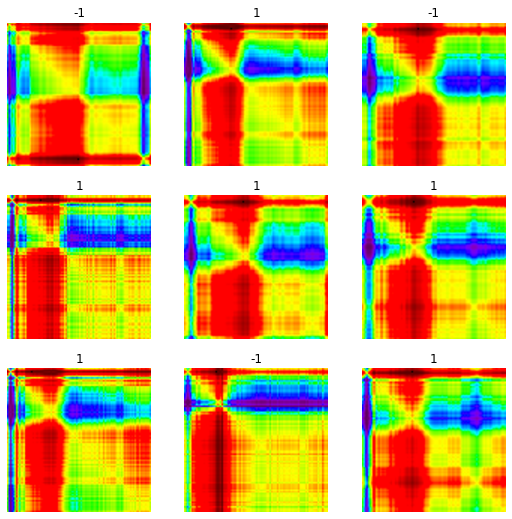

In [10]:
dls.show_batch()

SuggestedLRs(valley=0.00013182566908653826)

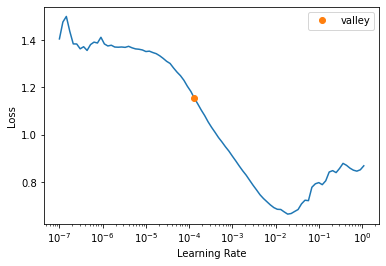

In [11]:
set_seed(8888, True)
learn = learn = Learner(dls, xresnet50(n_out=2), metrics=accuracy)
learn.lr_find(num_it=100)

In [30]:
lr =0.0004
learn.fit_one_cycle(10, lr)

epoch,train_loss,valid_loss,accuracy,time
0,0.053934,0.187611,0.900000,00:02
1,0.056611,0.207294,0.900000,00:01
2,0.060047,0.188188,0.900000,00:01
3,0.053246,0.191010,0.900000,00:01
4,0.049820,0.188386,0.900000,00:01
5,0.046032,0.190141,0.850000,00:01
6,0.042400,0.183614,0.850000,00:01
7,0.040092,0.174623,0.850000,00:01
8,0.038379,0.173556,0.850000,00:01
9,0.036182,0.177111,0.900000,00:01


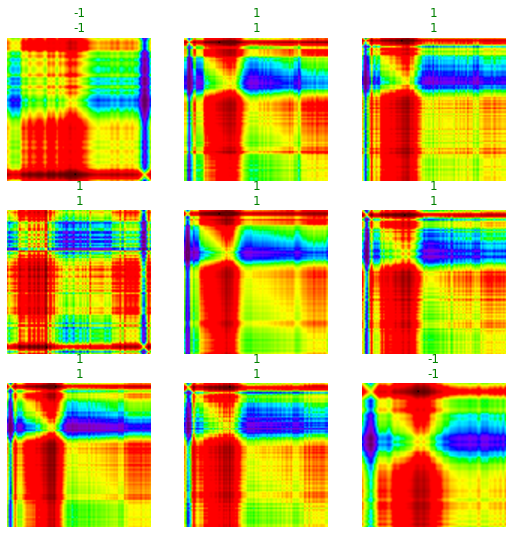

In [31]:
learn.show_results()

In [32]:
interp = Interpretation.from_learner(learn)

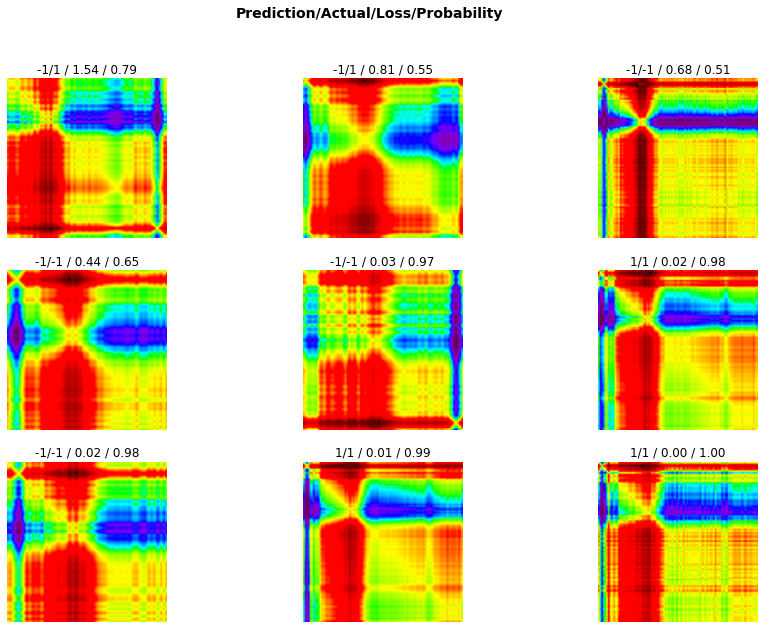

In [33]:
interp.plot_top_losses(9, figsize=(15,10))

### Testing ###

We test on previously unseed images and do not process at all in a dataloader block. We'll roll our own accuracy and confusion matrix. 

In [34]:
test_set_path = Path("Y:/ai-time-series-classification-export-gaf/ECG200/test/")
test_set_images = get_image_files(test_set_path)
test_set_images

(#100) [Path('Y:/ai-time-series-classification-export-gaf/ECG200/test/-1/104.png'),Path('Y:/ai-time-series-classification-export-gaf/ECG200/test/-1/109.png'),Path('Y:/ai-time-series-classification-export-gaf/ECG200/test/-1/110.png'),Path('Y:/ai-time-series-classification-export-gaf/ECG200/test/-1/112.png'),Path('Y:/ai-time-series-classification-export-gaf/ECG200/test/-1/113.png'),Path('Y:/ai-time-series-classification-export-gaf/ECG200/test/-1/114.png'),Path('Y:/ai-time-series-classification-export-gaf/ECG200/test/-1/118.png'),Path('Y:/ai-time-series-classification-export-gaf/ECG200/test/-1/120.png'),Path('Y:/ai-time-series-classification-export-gaf/ECG200/test/-1/126.png'),Path('Y:/ai-time-series-classification-export-gaf/ECG200/test/-1/128.png')...]

In [35]:
accuracy = [[0.0,0.0],[0.0,0.0]]
for i in test_set_images:
    actual = i.parts[4]
    print("---------------------------------")
    print("Actual:" + actual)
    result = learn.predict(i)
    print("Prediction:" + result[0])
    target_prob = result[2][0];
    print(float(target_prob))
    print(result)
    print("---------------------------------")
    print('\n')
    
    # true positive
    if(actual == '-1' and result[0] == '-1'):
        accuracy[0][0] = accuracy[0][0] + 1.0
    
    # false negative
    if(actual == '-1' and result[0] == '1'):
        accuracy[1][0] = accuracy[1][0] + 1.0
        
    #false positive
    if(actual != '-1' and result[0] == '-1'):
        accuracy[0][1] = accuracy[0][1] + 1.0
        
    #true negative
    if(actual != '-1' and result[0] != '-1'):
        accuracy[1][1] = accuracy[1][1] + 1.0

---------------------------------
Actual:-1


Prediction:1
0.36417996883392334
('1', TensorBase(1), TensorBase([0.3642, 0.6358]))
---------------------------------


---------------------------------
Actual:-1


Prediction:-1
0.9532930254936218
('-1', TensorBase(0), TensorBase([0.9533, 0.0467]))
---------------------------------


---------------------------------
Actual:-1


Prediction:1
0.32916444540023804
('1', TensorBase(1), TensorBase([0.3292, 0.6708]))
---------------------------------


---------------------------------
Actual:-1


Prediction:1
0.17632628977298737
('1', TensorBase(1), TensorBase([0.1763, 0.8237]))
---------------------------------


---------------------------------
Actual:-1


Prediction:-1
0.9419588446617126
('-1', TensorBase(0), TensorBase([0.9420, 0.0580]))
---------------------------------


---------------------------------
Actual:-1


Prediction:-1
0.8894739151000977
('-1', TensorBase(0), TensorBase([0.8895, 0.1105]))
---------------------------------


---------------------------------
Actual:-1


Prediction:-1
0.7545747756958008
('-1', TensorBase(0), TensorBase([0.7546, 0.2454]))
---------------------------------


---------------------------------
Actual:-1


Prediction:-1
0.5955024361610413
('-1', TensorBase(0), TensorBase([0.5955, 0.4045]))
---------------------------------


---------------------------------
Actual:-1


Prediction:-1
0.7837373614311218
('-1', TensorBase(0), TensorBase([0.7837, 0.2163]))
---------------------------------


---------------------------------
Actual:-1


Prediction:-1
0.8225332498550415
('-1', TensorBase(0), TensorBase([0.8225, 0.1775]))
---------------------------------


---------------------------------
Actual:-1


Prediction:-1
0.9484027624130249
('-1', TensorBase(0), TensorBase([0.9484, 0.0516]))
---------------------------------


---------------------------------
Actual:-1


Prediction:1
0.0035101755056530237
('1', TensorBase(1), TensorBase([0.0035, 0.9965]))
---------------------------------


---------------------------------
Actual:-1


Prediction:-1
0.8334349989891052
('-1', TensorBase(0), TensorBase([0.8334, 0.1666]))
---------------------------------


---------------------------------
Actual:-1


Prediction:-1
0.9863957166671753
('-1', TensorBase(0), TensorBase([0.9864, 0.0136]))
---------------------------------


---------------------------------
Actual:-1


Prediction:-1
0.8564953804016113
('-1', TensorBase(0), TensorBase([0.8565, 0.1435]))
---------------------------------


---------------------------------
Actual:-1


Prediction:1
0.17515407502651215
('1', TensorBase(1), TensorBase([0.1752, 0.8248]))
---------------------------------


---------------------------------
Actual:-1


Prediction:-1
0.7600178122520447
('-1', TensorBase(0), TensorBase([0.7600, 0.2400]))
---------------------------------


---------------------------------
Actual:-1


Prediction:-1
0.9803643226623535
('-1', TensorBase(0), TensorBase([0.9804, 0.0196]))
---------------------------------


---------------------------------
Actual:-1


Prediction:1
0.33815544843673706
('1', TensorBase(1), TensorBase([0.3382, 0.6618]))
---------------------------------


---------------------------------
Actual:-1


Prediction:1
0.00230862176977098
('1', TensorBase(1), TensorBase([0.0023, 0.9977]))
---------------------------------


---------------------------------
Actual:-1


Prediction:-1
0.9731144905090332
('-1', TensorBase(0), TensorBase([0.9731, 0.0269]))
---------------------------------


---------------------------------
Actual:-1


Prediction:-1
0.9234049916267395
('-1', TensorBase(0), TensorBase([0.9234, 0.0766]))
---------------------------------


---------------------------------
Actual:-1


Prediction:-1
0.9562699794769287
('-1', TensorBase(0), TensorBase([0.9563, 0.0437]))
---------------------------------


---------------------------------
Actual:-1


Prediction:1
0.020639125257730484
('1', TensorBase(1), TensorBase([0.0206, 0.9794]))
---------------------------------


---------------------------------
Actual:-1


Prediction:-1
0.9111198782920837
('-1', TensorBase(0), TensorBase([0.9111, 0.0889]))
---------------------------------


---------------------------------
Actual:-1


Prediction:-1
0.9731787443161011
('-1', TensorBase(0), TensorBase([0.9732, 0.0268]))
---------------------------------


---------------------------------
Actual:-1


Prediction:-1
0.9938046932220459
('-1', TensorBase(0), TensorBase([0.9938, 0.0062]))
---------------------------------


---------------------------------
Actual:-1


Prediction:1
0.3494044244289398
('1', TensorBase(1), TensorBase([0.3494, 0.6506]))
---------------------------------


---------------------------------
Actual:-1


Prediction:-1
0.9817531108856201
('-1', TensorBase(0), TensorBase([0.9818, 0.0182]))
---------------------------------


---------------------------------
Actual:-1


Prediction:-1
0.826656699180603
('-1', TensorBase(0), TensorBase([0.8267, 0.1733]))
---------------------------------


---------------------------------
Actual:-1


Prediction:-1
0.864402711391449
('-1', TensorBase(0), TensorBase([0.8644, 0.1356]))
---------------------------------


---------------------------------
Actual:-1


Prediction:-1
0.7799449563026428
('-1', TensorBase(0), TensorBase([0.7799, 0.2201]))
---------------------------------


---------------------------------
Actual:-1


Prediction:-1
0.8702256679534912
('-1', TensorBase(0), TensorBase([0.8702, 0.1298]))
---------------------------------


---------------------------------
Actual:-1


Prediction:1
0.1236320361495018
('1', TensorBase(1), TensorBase([0.1236, 0.8764]))
---------------------------------


---------------------------------
Actual:-1


Prediction:-1
0.9287095665931702
('-1', TensorBase(0), TensorBase([0.9287, 0.0713]))
---------------------------------


---------------------------------
Actual:-1


Prediction:-1
0.886645495891571
('-1', TensorBase(0), TensorBase([0.8866, 0.1134]))
---------------------------------


---------------------------------
Actual:1


Prediction:1
0.00038613026845268905
('1', TensorBase(1), TensorBase([3.8613e-04, 9.9961e-01]))
---------------------------------


---------------------------------
Actual:1


Prediction:1
0.0018978096777573228
('1', TensorBase(1), TensorBase([0.0019, 0.9981]))
---------------------------------


---------------------------------
Actual:1


Prediction:-1
0.8572060465812683
('-1', TensorBase(0), TensorBase([0.8572, 0.1428]))
---------------------------------


---------------------------------
Actual:1


Prediction:1
0.00045439001405611634
('1', TensorBase(1), TensorBase([4.5439e-04, 9.9955e-01]))
---------------------------------


---------------------------------
Actual:1


Prediction:1
0.0004928807029500604
('1', TensorBase(1), TensorBase([4.9288e-04, 9.9951e-01]))
---------------------------------


---------------------------------
Actual:1


Prediction:-1
0.5955833196640015
('-1', TensorBase(0), TensorBase([0.5956, 0.4044]))
---------------------------------


---------------------------------
Actual:1


Prediction:1
0.05986814573407173
('1', TensorBase(1), TensorBase([0.0599, 0.9401]))
---------------------------------


---------------------------------
Actual:1


Prediction:1
0.06813705712556839
('1', TensorBase(1), TensorBase([0.0681, 0.9319]))
---------------------------------


---------------------------------
Actual:1


Prediction:1
0.48172059655189514
('1', TensorBase(1), TensorBase([0.4817, 0.5183]))
---------------------------------


---------------------------------
Actual:1


Prediction:1
0.2783970832824707
('1', TensorBase(1), TensorBase([0.2784, 0.7216]))
---------------------------------


---------------------------------
Actual:1


Prediction:1
0.008237340487539768
('1', TensorBase(1), TensorBase([0.0082, 0.9918]))
---------------------------------


---------------------------------
Actual:1


Prediction:-1
0.6544421315193176
('-1', TensorBase(0), TensorBase([0.6544, 0.3456]))
---------------------------------


---------------------------------
Actual:1


Prediction:1
0.003811795264482498
('1', TensorBase(1), TensorBase([0.0038, 0.9962]))
---------------------------------


---------------------------------
Actual:1


Prediction:1
0.00038930168375372887
('1', TensorBase(1), TensorBase([3.8930e-04, 9.9961e-01]))
---------------------------------


---------------------------------
Actual:1


Prediction:1
0.004992842674255371
('1', TensorBase(1), TensorBase([0.0050, 0.9950]))
---------------------------------


---------------------------------
Actual:1


Prediction:1
8.903106936486438e-05
('1', TensorBase(1), TensorBase([8.9031e-05, 9.9991e-01]))
---------------------------------


---------------------------------
Actual:1


Prediction:1
4.6681366256962065e-06
('1', TensorBase(1), TensorBase([4.6681e-06, 1.0000e+00]))
---------------------------------


---------------------------------
Actual:1


Prediction:1
0.0362970344722271
('1', TensorBase(1), TensorBase([0.0363, 0.9637]))
---------------------------------


---------------------------------
Actual:1


Prediction:1
0.00978845078498125
('1', TensorBase(1), TensorBase([0.0098, 0.9902]))
---------------------------------


---------------------------------
Actual:1


Prediction:1
0.0025459984317421913
('1', TensorBase(1), TensorBase([0.0025, 0.9975]))
---------------------------------


---------------------------------
Actual:1


Prediction:1
0.00039292388828471303
('1', TensorBase(1), TensorBase([3.9292e-04, 9.9961e-01]))
---------------------------------


---------------------------------
Actual:1


Prediction:1
0.000784900039434433
('1', TensorBase(1), TensorBase([7.8490e-04, 9.9922e-01]))
---------------------------------


---------------------------------
Actual:1


Prediction:1
0.24306422472000122
('1', TensorBase(1), TensorBase([0.2431, 0.7569]))
---------------------------------


---------------------------------
Actual:1


Prediction:1
0.23874099552631378
('1', TensorBase(1), TensorBase([0.2387, 0.7613]))
---------------------------------


---------------------------------
Actual:1


Prediction:1
0.014326738193631172
('1', TensorBase(1), TensorBase([0.0143, 0.9857]))
---------------------------------


---------------------------------
Actual:1


Prediction:1
0.11701630800962448
('1', TensorBase(1), TensorBase([0.1170, 0.8830]))
---------------------------------


---------------------------------
Actual:1


Prediction:1
0.00017080208635888994
('1', TensorBase(1), TensorBase([1.7080e-04, 9.9983e-01]))
---------------------------------


---------------------------------
Actual:1


Prediction:-1
0.7134988307952881
('-1', TensorBase(0), TensorBase([0.7135, 0.2865]))
---------------------------------


---------------------------------
Actual:1


Prediction:1
0.0047784182243049145
('1', TensorBase(1), TensorBase([0.0048, 0.9952]))
---------------------------------


---------------------------------
Actual:1


Prediction:1
0.0014704206259921193
('1', TensorBase(1), TensorBase([0.0015, 0.9985]))
---------------------------------


---------------------------------
Actual:1


Prediction:1
0.00046688882866874337
('1', TensorBase(1), TensorBase([4.6689e-04, 9.9953e-01]))
---------------------------------


---------------------------------
Actual:1


Prediction:1
0.00011713895219145343
('1', TensorBase(1), TensorBase([1.1714e-04, 9.9988e-01]))
---------------------------------


---------------------------------
Actual:1


Prediction:1
0.38800087571144104
('1', TensorBase(1), TensorBase([0.3880, 0.6120]))
---------------------------------


---------------------------------
Actual:1


Prediction:1
0.001045362907461822
('1', TensorBase(1), TensorBase([0.0010, 0.9990]))
---------------------------------


---------------------------------
Actual:1


Prediction:1
0.04965345934033394
('1', TensorBase(1), TensorBase([0.0497, 0.9503]))
---------------------------------


---------------------------------
Actual:1


Prediction:1
0.0035368455573916435
('1', TensorBase(1), TensorBase([0.0035, 0.9965]))
---------------------------------


---------------------------------
Actual:1


Prediction:1
0.0030144548509269953
('1', TensorBase(1), TensorBase([0.0030, 0.9970]))
---------------------------------


---------------------------------
Actual:1


Prediction:1
0.001908111502416432
('1', TensorBase(1), TensorBase([0.0019, 0.9981]))
---------------------------------


---------------------------------
Actual:1


Prediction:1
0.00014339010522235185
('1', TensorBase(1), TensorBase([1.4339e-04, 9.9986e-01]))
---------------------------------


---------------------------------
Actual:1


Prediction:1
0.0009889417560771108
('1', TensorBase(1), TensorBase([9.8894e-04, 9.9901e-01]))
---------------------------------


---------------------------------
Actual:1


Prediction:1
0.021527722477912903
('1', TensorBase(1), TensorBase([0.0215, 0.9785]))
---------------------------------


---------------------------------
Actual:1


Prediction:1
0.001749696908518672
('1', TensorBase(1), TensorBase([0.0017, 0.9983]))
---------------------------------


---------------------------------
Actual:1


Prediction:1
0.003101138398051262
('1', TensorBase(1), TensorBase([0.0031, 0.9969]))
---------------------------------


---------------------------------
Actual:1


Prediction:1
0.0016250901389867067
('1', TensorBase(1), TensorBase([0.0016, 0.9984]))
---------------------------------


---------------------------------
Actual:1


Prediction:1
0.00045841821702197194
('1', TensorBase(1), TensorBase([4.5842e-04, 9.9954e-01]))
---------------------------------


---------------------------------
Actual:1


Prediction:1
0.024404872208833694
('1', TensorBase(1), TensorBase([0.0244, 0.9756]))
---------------------------------


---------------------------------
Actual:1


Prediction:1
0.11993032693862915
('1', TensorBase(1), TensorBase([0.1199, 0.8801]))
---------------------------------


---------------------------------
Actual:1


Prediction:1
0.002318458864465356
('1', TensorBase(1), TensorBase([0.0023, 0.9977]))
---------------------------------


---------------------------------
Actual:1


Prediction:1
0.0023634014651179314
('1', TensorBase(1), TensorBase([0.0024, 0.9976]))
---------------------------------


---------------------------------
Actual:1


Prediction:1
0.391008585691452
('1', TensorBase(1), TensorBase([0.3910, 0.6090]))
---------------------------------


---------------------------------
Actual:1


Prediction:1
0.00024159163876902312
('1', TensorBase(1), TensorBase([2.4159e-04, 9.9976e-01]))
---------------------------------


---------------------------------
Actual:1


Prediction:1
0.0037399569991976023
('1', TensorBase(1), TensorBase([0.0037, 0.9963]))
---------------------------------


---------------------------------
Actual:1


Prediction:1
0.001051640952937305
('1', TensorBase(1), TensorBase([0.0011, 0.9989]))
---------------------------------


---------------------------------
Actual:1


Prediction:-1
0.8411832451820374
('-1', TensorBase(0), TensorBase([0.8412, 0.1588]))
---------------------------------


---------------------------------
Actual:1


Prediction:1
0.0002886521106120199
('1', TensorBase(1), TensorBase([2.8865e-04, 9.9971e-01]))
---------------------------------


---------------------------------
Actual:1


Prediction:1
0.09449157118797302
('1', TensorBase(1), TensorBase([0.0945, 0.9055]))
---------------------------------


---------------------------------
Actual:1


Prediction:1
0.0007745543261989951
('1', TensorBase(1), TensorBase([7.7455e-04, 9.9923e-01]))
---------------------------------


---------------------------------
Actual:1


Prediction:1
0.01251038908958435
('1', TensorBase(1), TensorBase([0.0125, 0.9875]))
---------------------------------


---------------------------------
Actual:1


Prediction:-1
0.8632495999336243
('-1', TensorBase(0), TensorBase([0.8632, 0.1368]))
---------------------------------


---------------------------------
Actual:1


Prediction:1
0.00013184155977796763
('1', TensorBase(1), TensorBase([1.3184e-04, 9.9987e-01]))
---------------------------------


---------------------------------
Actual:1


Prediction:-1
0.8534379601478577
('-1', TensorBase(0), TensorBase([0.8534, 0.1466]))
---------------------------------


---------------------------------
Actual:1


Prediction:1
0.00655353581532836
('1', TensorBase(1), TensorBase([0.0066, 0.9934]))
---------------------------------


---------------------------------
Actual:1


Prediction:1
0.07933871448040009
('1', TensorBase(1), TensorBase([0.0793, 0.9207]))
---------------------------------


---------------------------------
Actual:1


Prediction:1
0.2834640145301819
('1', TensorBase(1), TensorBase([0.2835, 0.7165]))
---------------------------------




Confustion matrix:

In [36]:
from IPython.display import display, HTML
display(HTML(pd.DataFrame(accuracy).to_html()))

,0,1
0,26.0,7.0
1,10.0,57.0


In [37]:
# accuracy
accuracy_t = Tensor(accuracy)
accuracy_val = accuracy_t.trace() / accuracy_t.sum()
print(accuracy_val)

tensor(0.8300)
